# Convolutional Neural Net to Classify Cats and Dogs

The aim of this notebook to is train a CNN to detect if a picture contains a cat or a dog using Keras with a Tensorflow backend. This is one of my first forays into CNN's so this project was intented for me to gain a better understanding of preprocessing, building, and tuning, a convolutional neural network. The data is organized into 8000 pictures evenly split between cats and dogs which is used to train the CNN, and an additional 2000 pictures to use as a validation set. The images are colored, meaning that the input data will have

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
plt.style.use('fivethirtyeight')

from keras.models import Sequential
from keras.layers import Convolution2D, MaxPool2D, Flatten, Dense, Dropout
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import History, EarlyStopping

## Example Data

To get an idea of what kind of pictures will be used to train the dataset, the following will show a typical example of the dataset. As you can see different breeds, colors, sizes, and positions are used in order for the CNN to get a holistic understanding of the differences between a cat and a dog. This will help the CNN detect pixel patterns that correspond to each species.

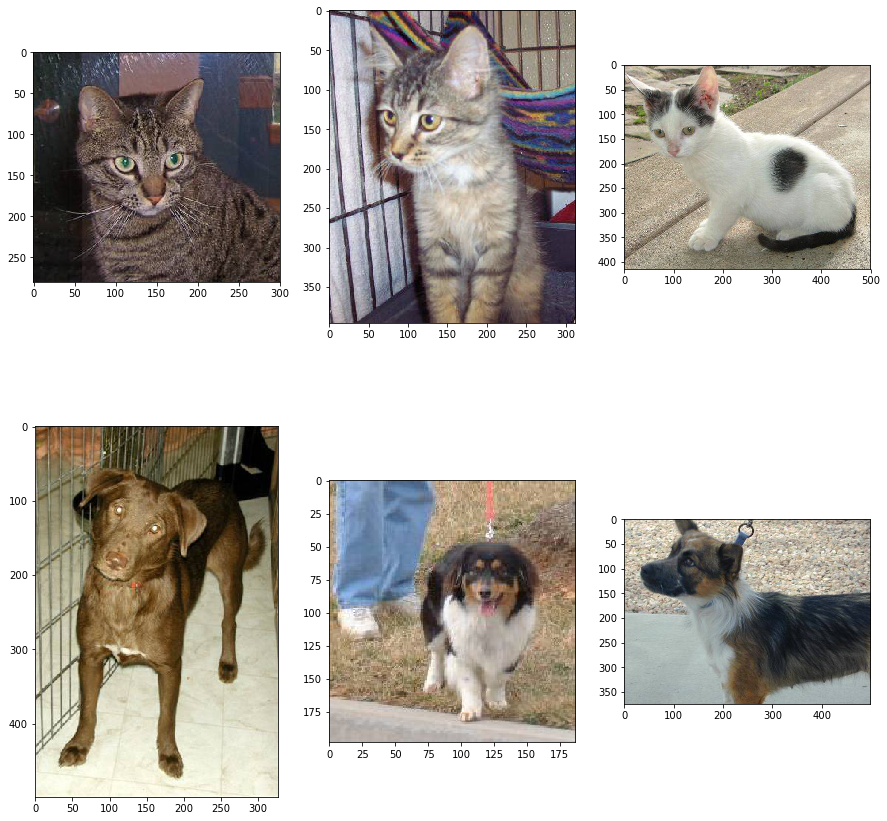

In [7]:
plt.subplots(figsize=(15,15))
plt.subplot(231)
plt.imshow(mpimg.imread('dataset/training_set/cats/cat.1.jpg'))
plt.subplot(232)
plt.imshow(mpimg.imread('dataset/training_set/cats/cat.2.jpg'))
plt.subplot(233)
plt.imshow(mpimg.imread('dataset/training_set/cats/cat.3.jpg'))


plt.subplot(234)
plt.imshow(mpimg.imread('dataset/training_set/dogs/dog.1.jpg'))
plt.subplot(235)
plt.imshow(mpimg.imread('dataset/training_set/dogs/dog.2.jpg'))
plt.subplot(236)
plt.imshow(mpimg.imread('dataset/training_set/dogs/dog.3.jpg'))

## CNN Architecture

Given my computer's abilities, I had some restrictions how how large a network and which hyperparamters I could use. Tuning a CNN requires a great amount of time given the number of possible architectures, regularization methods, learning rates, etc. All the layers utilize a ReLu activation function except for the output node, which uses a sigmoid activation. The optimizer used is RMSprop at a learning rate of .0001.

The layer I ended up using was as follows:

* 1st Convolutional Layer
* 2nd Convolutional Layer
* Pooling Layer
* Dropout (25%)


* 1st Convolutional Layer
* 2nd Convolutional Layer
* Pooling Layer
* Dropout (12.5%)


* 1st Convolutional Layer
* 2nd Convolutional Layer
* Pooling Layer
* Dropout (7.25%)


* Flatten 


* 64 Node Dense Layer
* Dropout (25%)


* 64 Node Dense Layer
* Dropout (25%)


* Output


Although this is probably not optimal, after a few days of trying different architectures this seems to work the best. 

In [8]:
def cat_dog_model():
    #Initializing
    classifier = Sequential()
    
    
    classifier.add(Convolution2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
    classifier.add(Convolution2D(32, (3, 3), activation = 'relu'))
    
    classifier.add(MaxPool2D(pool_size = (2,2)))
    classifier.add(Dropout(.25))
    
    
    classifier.add(Convolution2D(64, (3, 3), activation = 'relu'))
    classifier.add(Convolution2D(64, (3, 3), activation = 'relu'))
    classifier.add(MaxPool2D(pool_size = (2,2)))
    classifier.add(Dropout(.25/2))
    
    
    classifier.add(Convolution2D(128, (3, 3), activation = 'relu'))
    classifier.add(Convolution2D(128, (3, 3), activation = 'relu'))
    classifier.add(MaxPool2D(pool_size = (2,2)))
    classifier.add(Dropout(.25/4))
    #Flatten
    classifier.add(Flatten())
    
    #Full Connection
    classifier.add(Dense(64, activation = 'relu'))
    classifier.add(Dropout(.25))
    
    classifier.add(Dense(64, activation = 'relu'))
    classifier.add(Dropout(.25))
    
    classifier.add(Dense(1, activation = 'sigmoid'))
    
    optimizer = RMSprop(lr = 1e-4)
    #Compile
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    
    return classifier

In [9]:
model = cat_dog_model()

## Preprocessing and Fitting

In order to get a higher accuraccy, we will be using Keras' ImageDataGenerator to preprocess our data. We will normalize our dataset by divided each pixel by its range of values (255 in this case).  It can also be used to augment existing data to expand out dataset. It does this be sheering, skewing, or rotating a percentage of the images so that the pixels differ slightly, but still retain the essence of the image

In [10]:
#Preprocess & fit
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory(
        'dataset/training_set',
        target_size=(64, 64),
        batch_size=batch_size,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'dataset/test_set',
        target_size=(64, 64),
        batch_size=batch_size,
        class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


We will be initializing some callbacks for the neural network.First we will use a training history so we can analyze the training and validation set loss/accuracy over the number of epochs. This will give us an indication of how well the network performs over time. 

Second we will use an early stopping callback. This forces the training to stop if the validation loss ceases to decrease over 5 epochs. This will be  useful if the training loss and validation loss start to diverge and will save us a lot of time in tuning the CNN. 

In [11]:
history = History()
early_stop = EarlyStopping(patience = 5)

In [13]:
model.fit_generator(
        training_set,
        steps_per_epoch=8000/batch_size,
        epochs=50,
        validation_data=test_set,
        validation_steps=2000/batch_size,
        callbacks = [history, early_stop])

Epoch 1/50
250/250 [==============================] - 154s - loss: 0.6575 - acc: 0.6071 - val_loss: 0.6495 - val_acc: 0.6220
Epoch 2/50
250/250 [==============================] - 150s - loss: 0.6510 - acc: 0.6169 - val_loss: 0.6451 - val_acc: 0.6335
Epoch 3/50
250/250 [==============================] - 145s - loss: 0.6404 - acc: 0.6356 - val_loss: 0.6262 - val_acc: 0.6560
Epoch 4/50
250/250 [==============================] - 143s - loss: 0.6276 - acc: 0.6474 - val_loss: 0.6137 - val_acc: 0.6595
Epoch 5/50
250/250 [==============================] - 141s - loss: 0.6156 - acc: 0.6634 - val_loss: 0.5902 - val_acc: 0.6970
Epoch 6/50
250/250 [==============================] - 138s - loss: 0.5933 - acc: 0.6841 - val_loss: 0.5811 - val_acc: 0.7090
Epoch 7/50
250/250 [==============================] - 138s - loss: 0.5792 - acc: 0.6920 - val_loss: 0.5760 - val_acc: 0.6960
Epoch 8/50
250/250 [==============================] - 137s - loss: 0.5584 - acc: 0.7142 - val_loss: 0.5736 - val_acc: 0.7060


# Result

We see that there is a steady progression up until the 26th epoch, at which time the losses start to diverage. The validation loss becomes more sporatic, while the training loss decreases steady. This is a classic sign of overtraining. Looking back, some solutions could be more dropout layers, bigger regularization penalty, or perhaps creating more images uses the DataGen in keras.

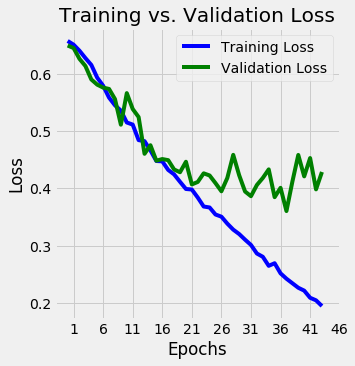

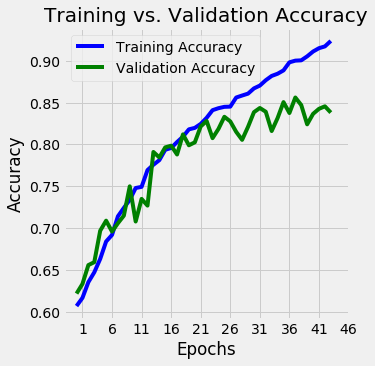

In [46]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.subplots(figsize = (10,5))
plt.subplot(121)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs. Validation Loss')
plt.plot(loss, 'blue', label='Training Loss')
plt.plot(val_loss, 'green', label='Validation Loss')
plt.xticks(np.arange(1, 51, 5))
plt.legend()
plt.show()

loss = history.history['acc']
val_loss = history.history['val_acc']

plt.subplots(figsize = (10,5))
plt.subplot(122)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs. Validation Accuracy')
plt.plot(loss, 'blue', label='Training Accuracy')
plt.plot(val_loss, 'green', label='Validation Accuracy')
plt.xticks(np.arange(1, 51, 5))
plt.legend()
plt.show()

# Predictions

We can now use this CNN to upload our own pictures and classify the contents as a cat or dog. The image may look different what what is uploaded, as the CNN decompresses the image to a 64 by 64 bit image.

dog


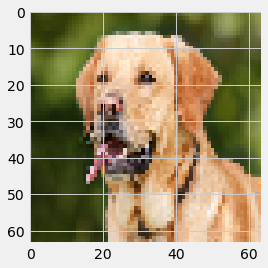

In [52]:
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'
print(prediction)